In [ ]:
#default_exp spatial

# Spatial Analysis

<br>

### Imports

In [7]:
#exports
import pandas as pd
import geopandas as gpd

import requests
import warnings

import matplotlib.pyplot as plt

In [14]:
#export
def df_to_gdf(
    df: pd.DataFrame,
    crs: str='EPSG:4326',
    lat_col: str='Latitude',
    lon_col: str='Longitude'
):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
    
        gdf = gpd.GeoDataFrame(
            df.drop(columns=[lat_col, lon_col]),
            geometry=gpd.points_from_xy(df[lat_col].values, df[lon_col].values, crs=crs),
            crs=crs
        )

    return gdf

def load_subsation_locs_gdf(
    wpd_network_capacity_map_url: str='https://connecteddata.westernpower.co.uk/dataset/967404e0-f25c-469b-8857-1a396f3c363f/resource/d1895bd3-d9d2-4886-a0a3-b7eadd9ab6c2/download/wpd-network-capacity-map.csv',
    network_ids_filter: list=[15130, 15264, 15246]
):
    df_wpd_map = pd.read_csv(wpd_network_capacity_map_url)
    df_wpd_map_focus = df_wpd_map.query('Network_Reference_ID in @network_ids_filter')

    df_subsation_locs = df_wpd_map_focus.set_index('Substation_Name')[['Latitude', 'Longitude']]
    df_subsation_locs.index = df_subsation_locs.index.str.lower()

    gdf_subsation_locs = df_to_gdf(df_subsation_locs)
    
    return gdf_subsation_locs

In [15]:
gdf_subsation_locs = load_subsation_locs_gdf()

gdf_subsation_locs

,geometry
Substation_Name,
geevor,POINT (50.14890 -5.67300)
mousehole,POINT (50.08380 -5.54870)
staplegrove,POINT (51.02540 -3.12040)


In [16]:
#exports
def load_weather_grid_locs_gdf(
    weather_grid_locs: list=[
        {'Name': 'mousehole_1', 'Latitude': 50.0, 'Longitude': -5.625},
        {'Name': 'mousehole_2', 'Latitude': 50.0, 'Longitude': -5.0},
        {'Name': 'mousehole_3', 'Latitude': 50.5, 'Longitude': -5.625},
        {'Name': 'mousehole_4', 'Latitude': 50.5, 'Longitude': -5.0},
        {'Name': 'mousehole_5', 'Latitude': 50.5, 'Longitude': -4.375},
        {'Name': 'staplegrove_1', 'Latitude': 51.0, 'Longitude': -3.125},
        {'Name': 'staplegrove_2', 'Latitude': 51.0, 'Longitude': -2.5},
        {'Name': 'staplegrove_3', 'Latitude': 51.5, 'Longitude': -3.125},
        {'Name': 'staplegrove_4', 'Latitude': 51.5, 'Longitude': -2.5},
        {'Name': 'staplegrove_5', 'Latitude': 51.0, 'Longitude': -3.75}
    ]
):
    gdf_weather_grid_locs = df_to_gdf(pd.DataFrame(weather_grid_locs).set_index('Name'))

    return gdf_weather_grid_locs

In [18]:
gdf_weather_grid_locs = load_weather_grid_locs_gdf()

gdf_weather_grid_locs

,geometry
Name,
mousehole_1,POINT (50.00000 -5.62500)
mousehole_2,POINT (50.00000 -5.00000)
mousehole_3,POINT (50.50000 -5.62500)
mousehole_4,POINT (50.50000 -5.00000)
mousehole_5,POINT (50.50000 -4.37500)
staplegrove_1,POINT (51.00000 -3.12500)
staplegrove_2,POINT (51.00000 -2.50000)
staplegrove_3,POINT (51.50000 -3.12500)
staplegrove_4,POINT (51.50000 -2.50000)


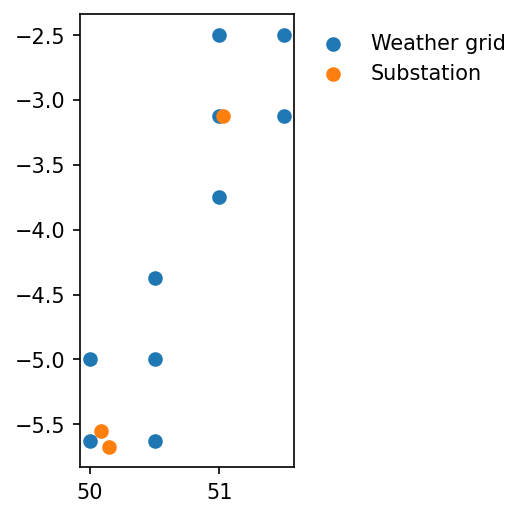

In [23]:
fig, ax = plt.subplots(dpi=150)

gdf_weather_grid_locs.plot(ax=ax, label='Weather grid')
gdf_subsation_locs.plot(ax=ax, label='Substation')

ax.legend(frameon=False, bbox_to_anchor=(1, 1))